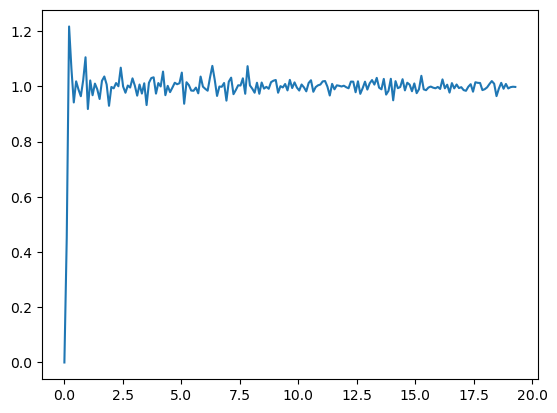

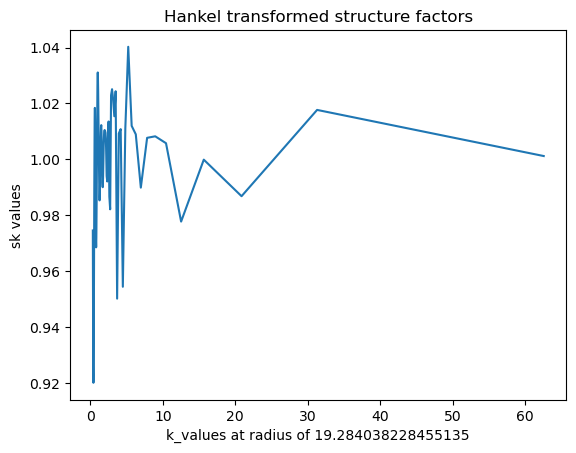

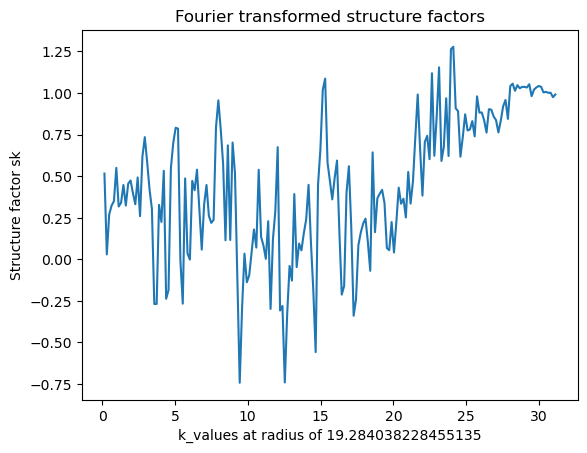

16.61643158571955


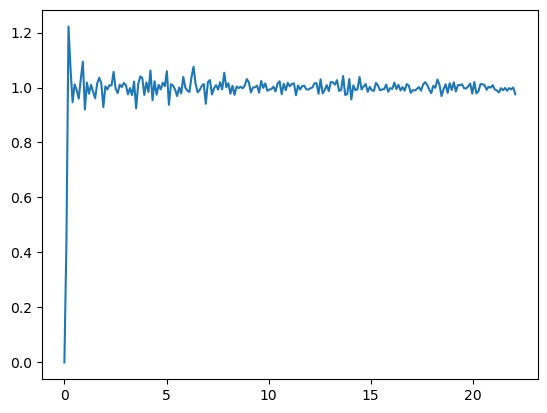

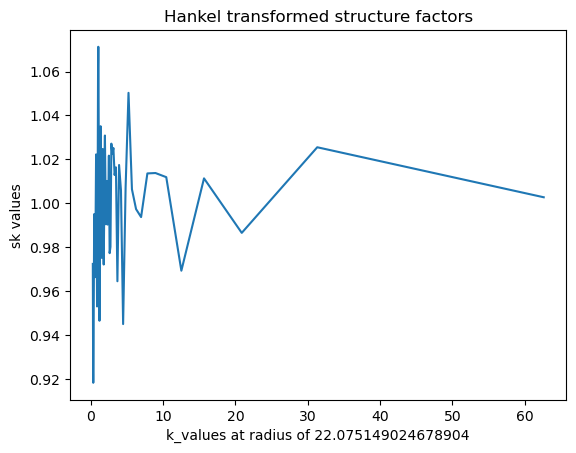

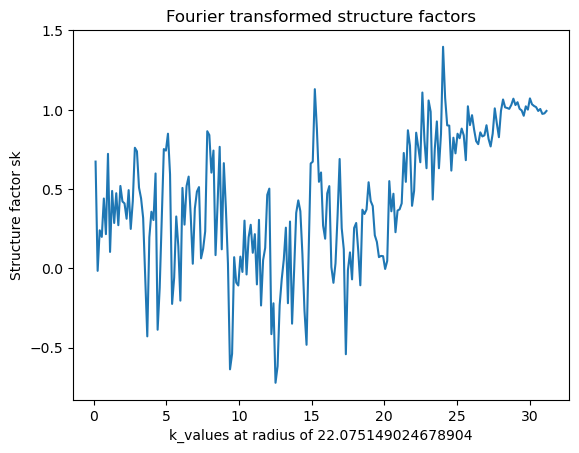

24.467487911608764


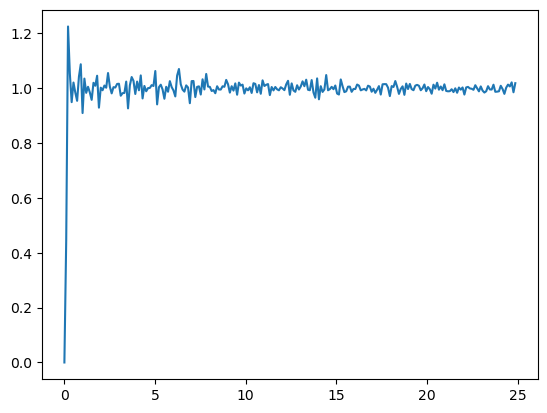

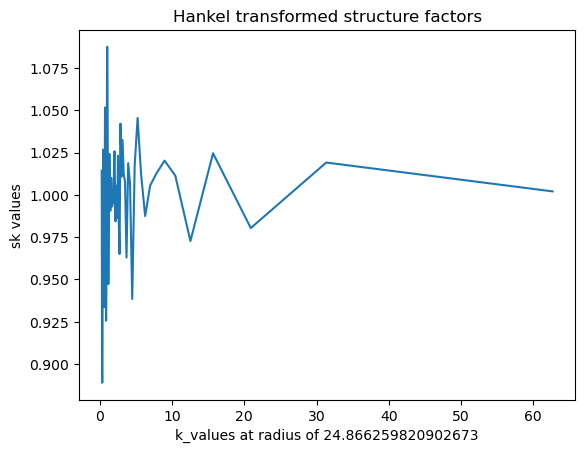

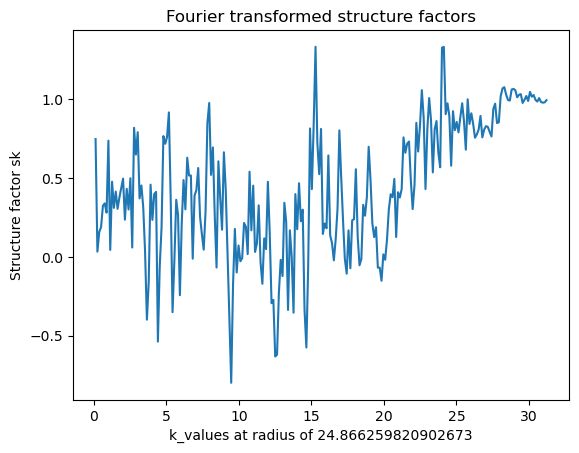

32.5214121329127


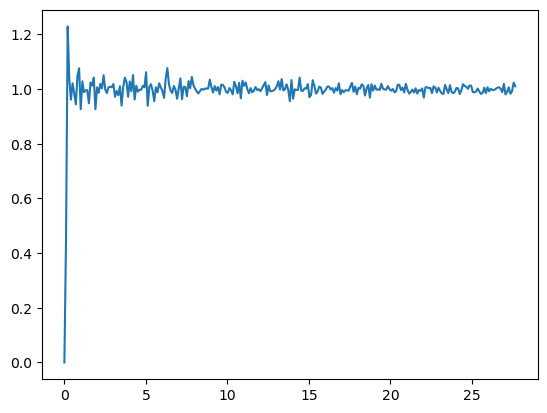

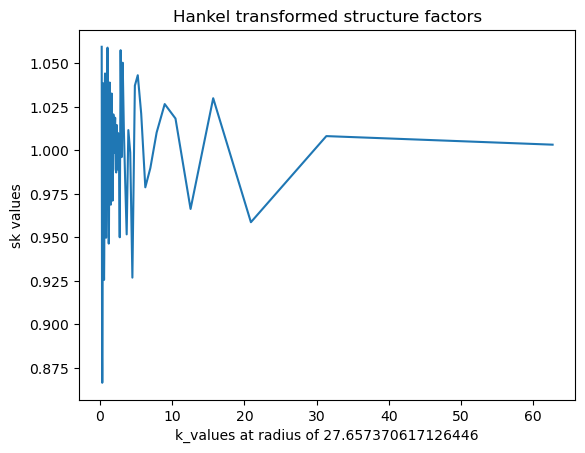

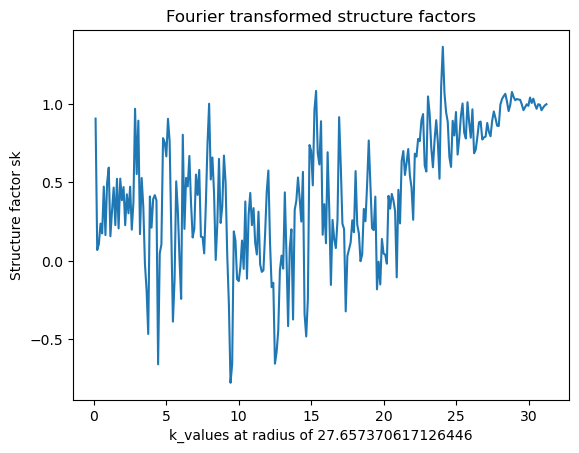

47.86592492792957


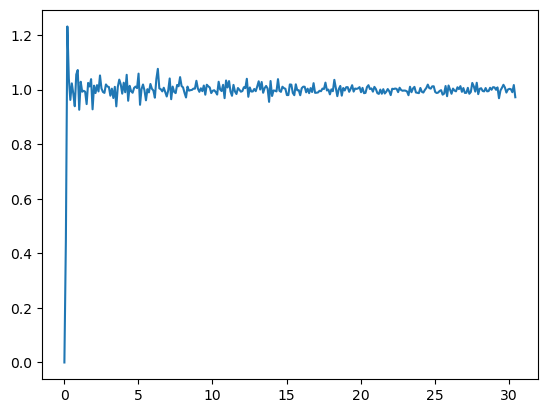

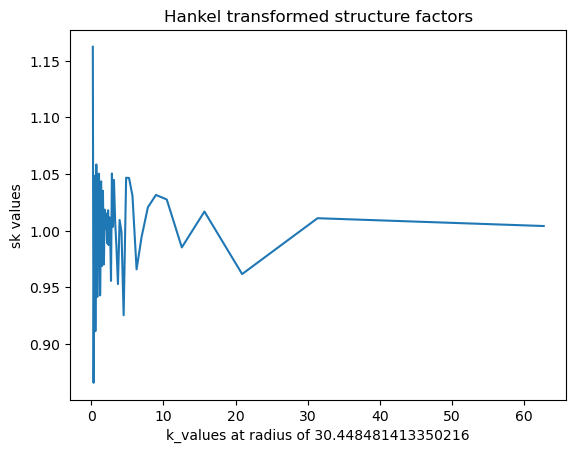

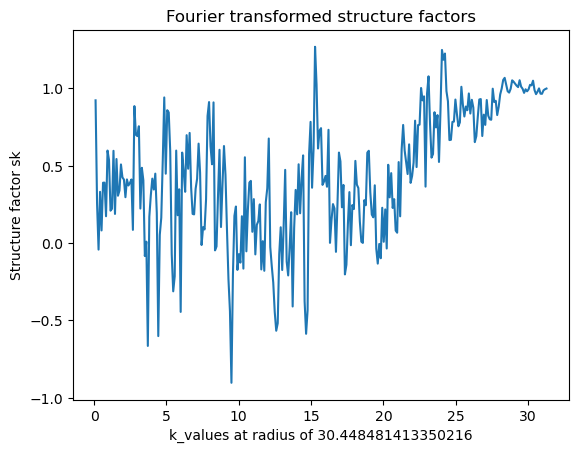

62.15858707592041


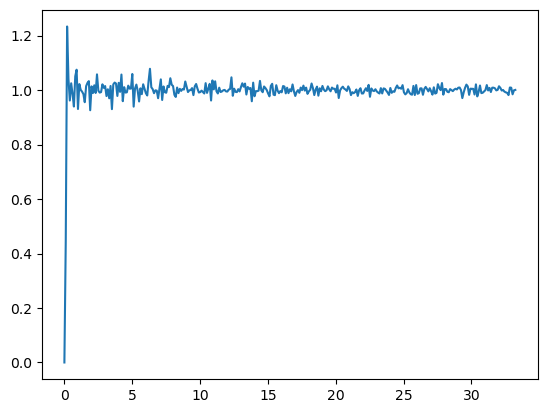

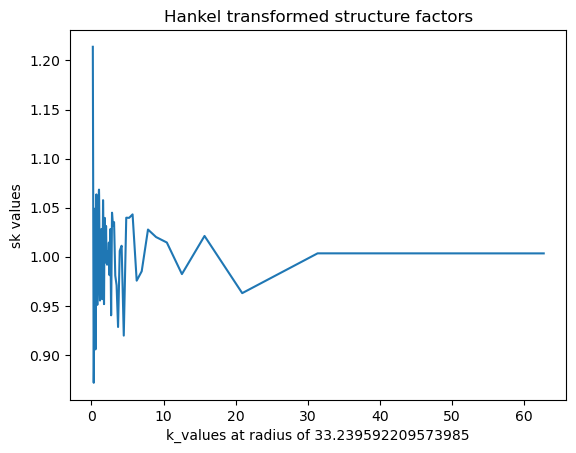

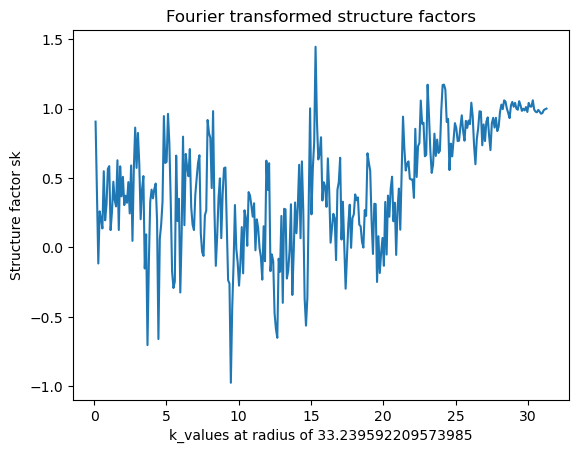

76.26649881375938


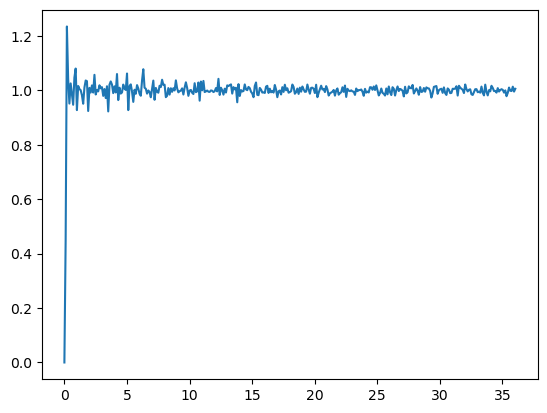

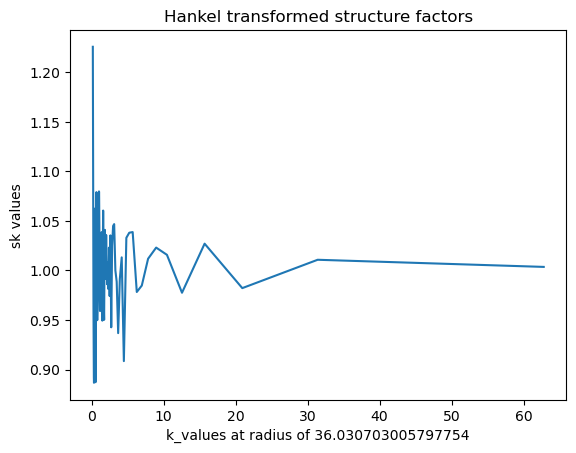

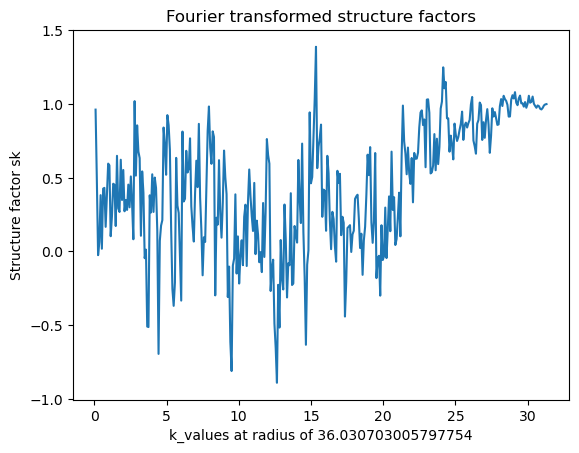

96.00542082167684


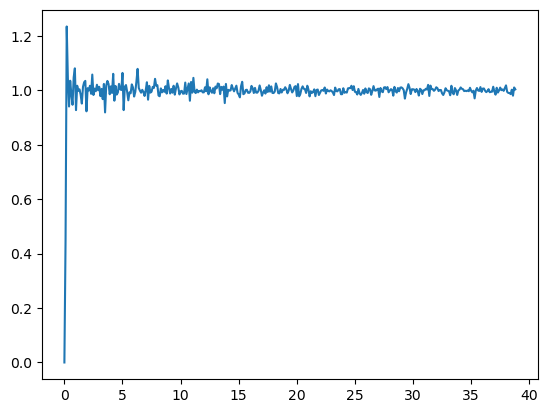

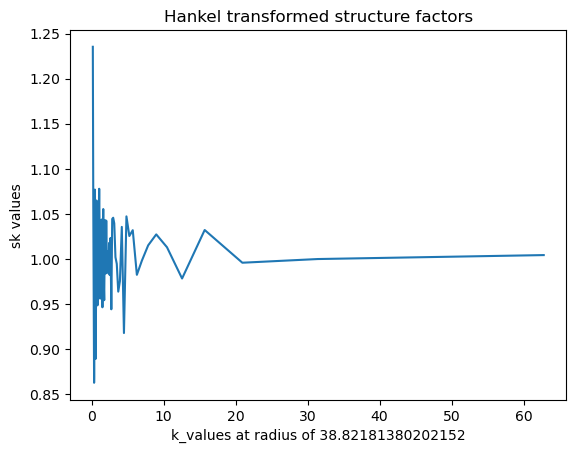

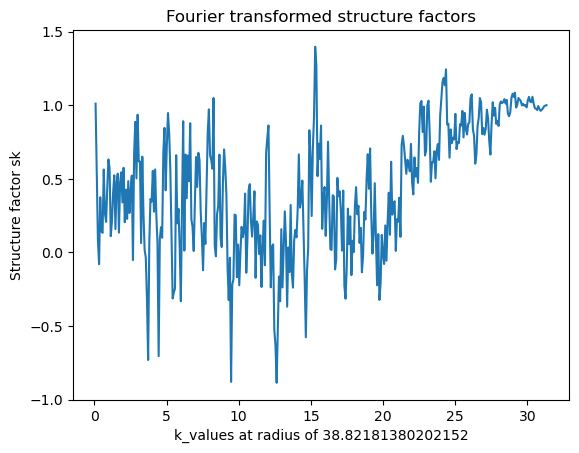

117.93881991988319


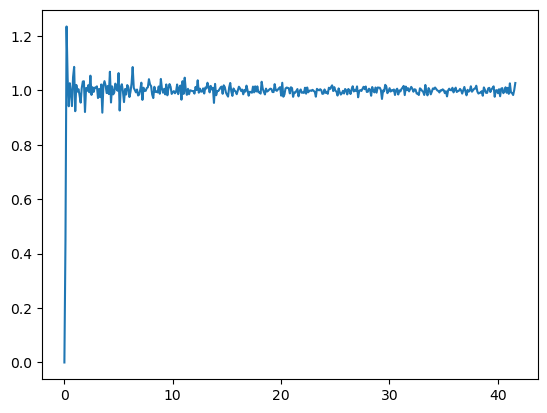

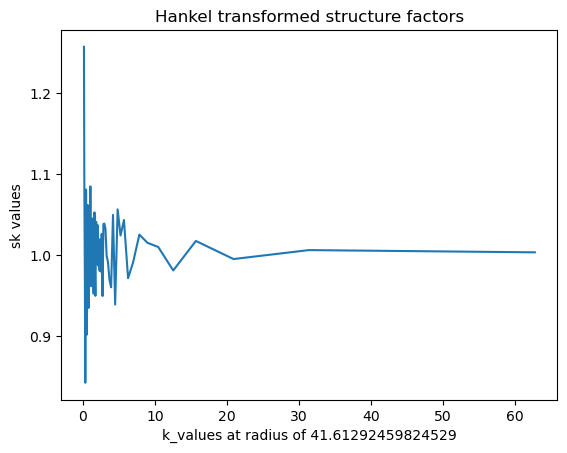

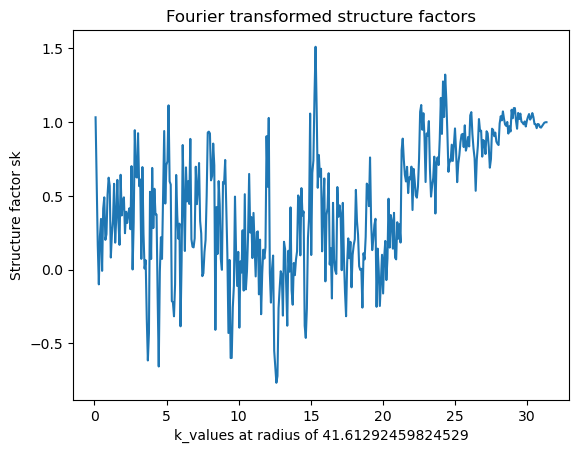

142.5102122826456


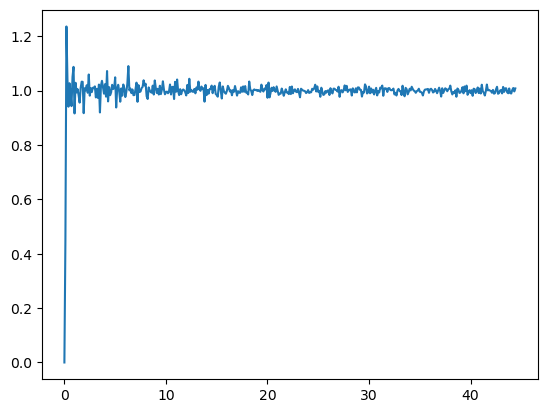

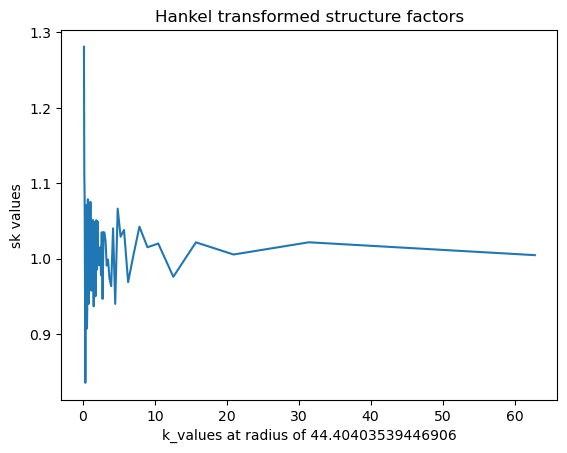

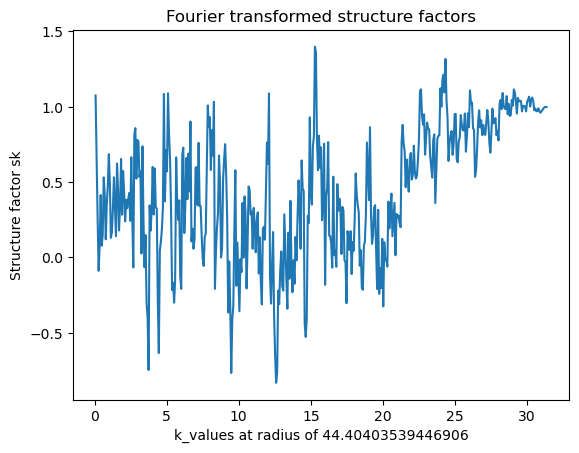

172.06792981317395


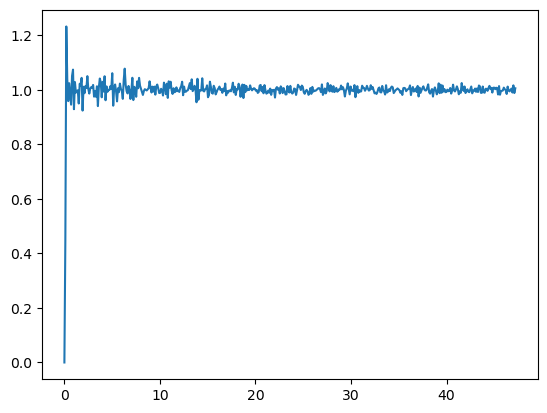

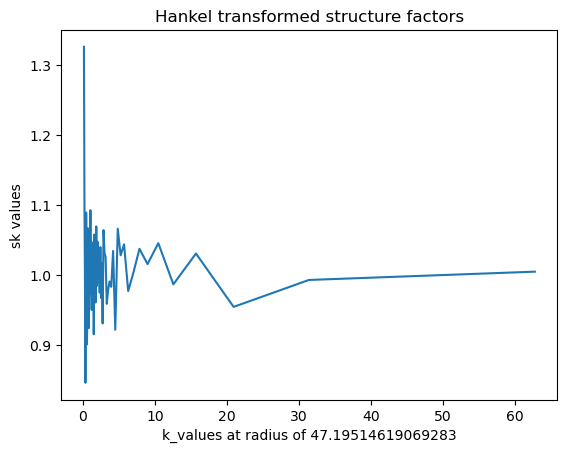

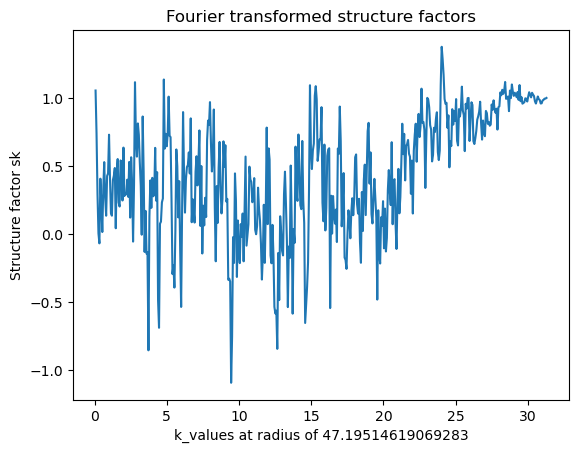

197.90578028276147


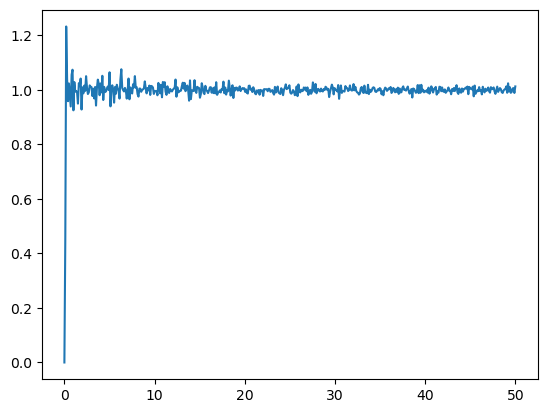

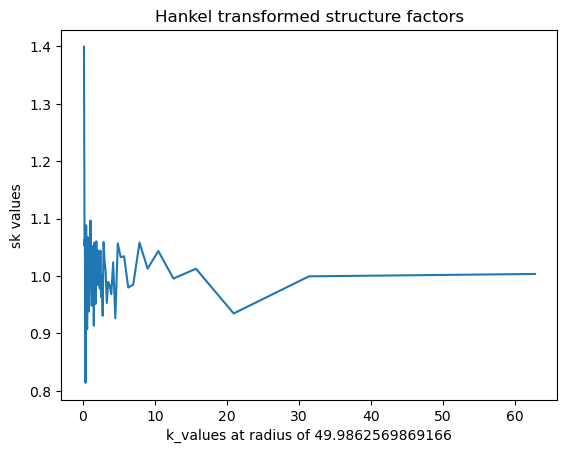

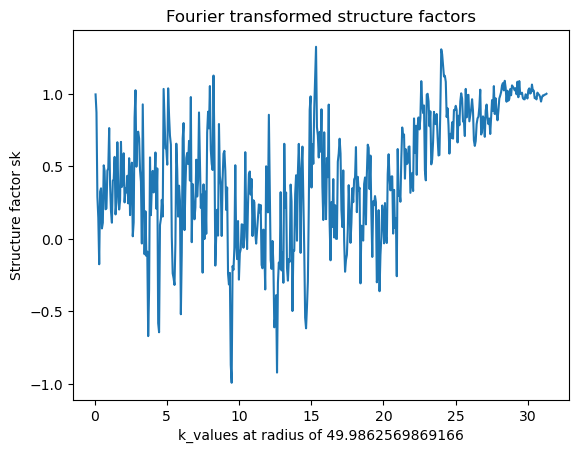

224.79644042572846


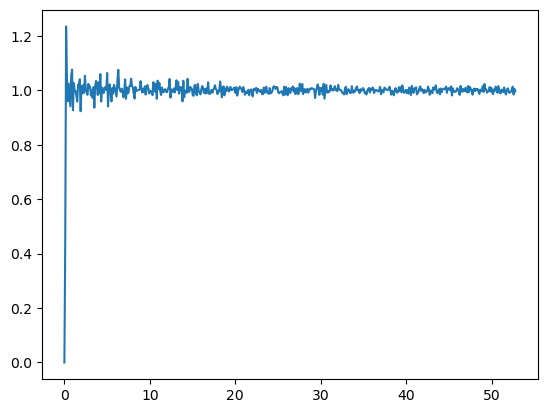

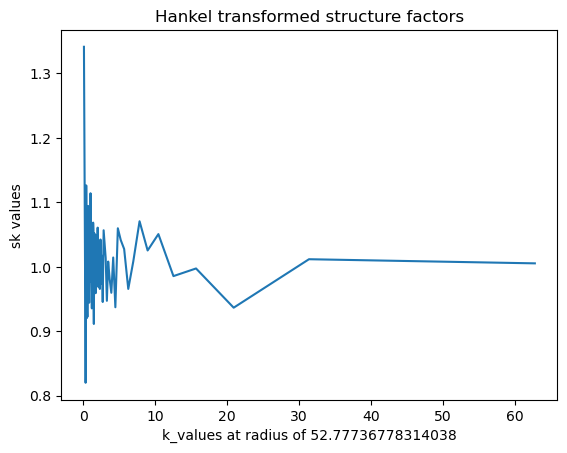

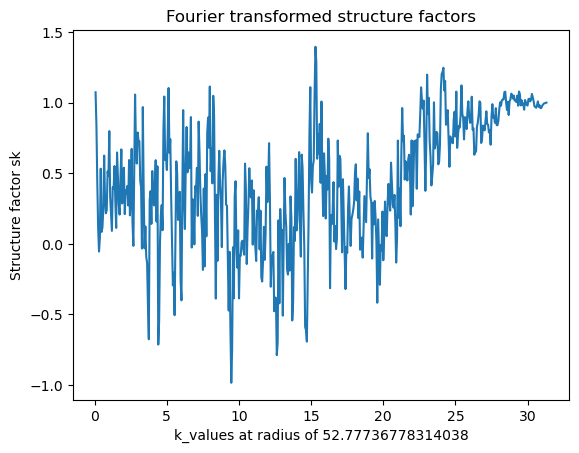

264.06706387375067


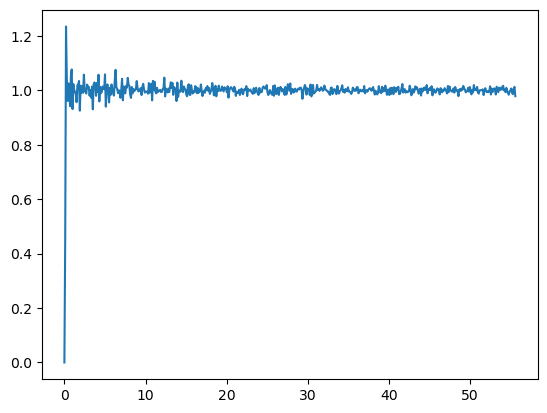

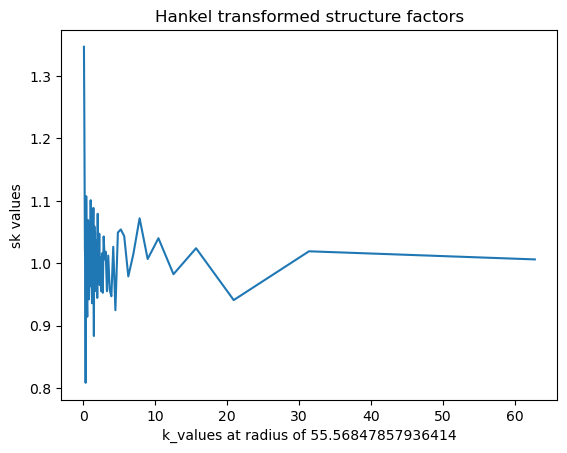

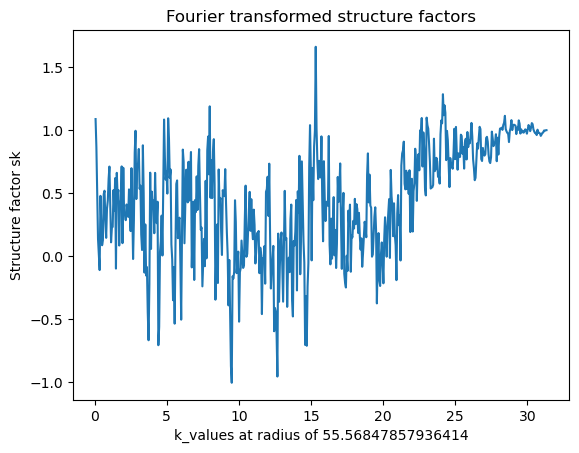

302.4813685672034


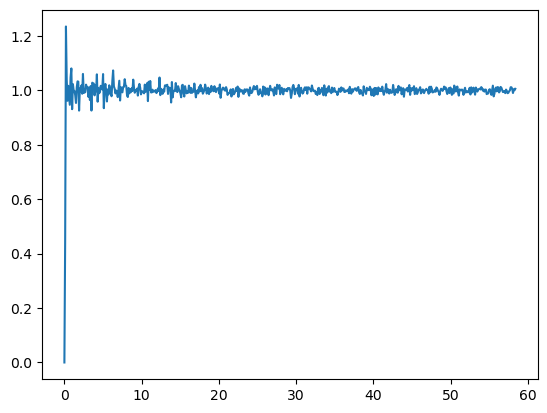

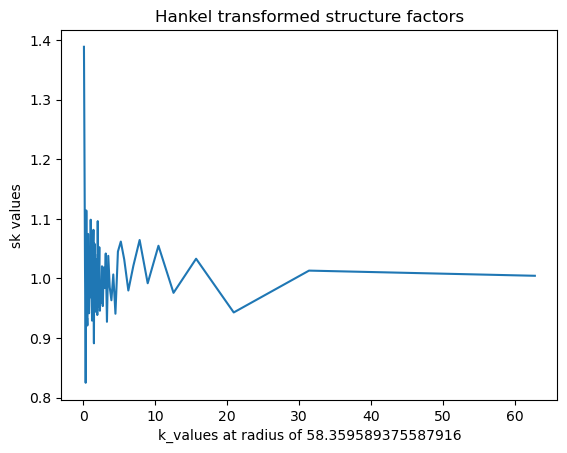

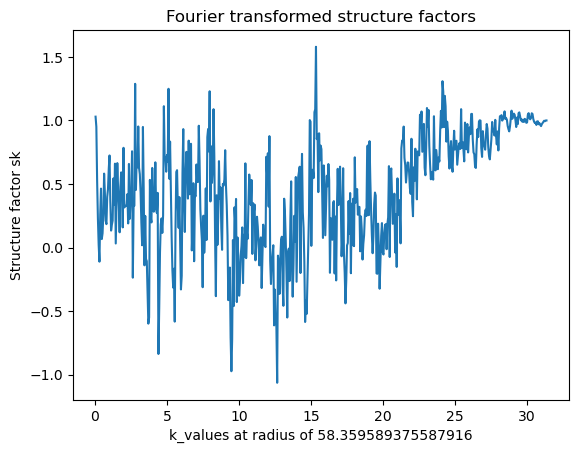

333.4050795245432


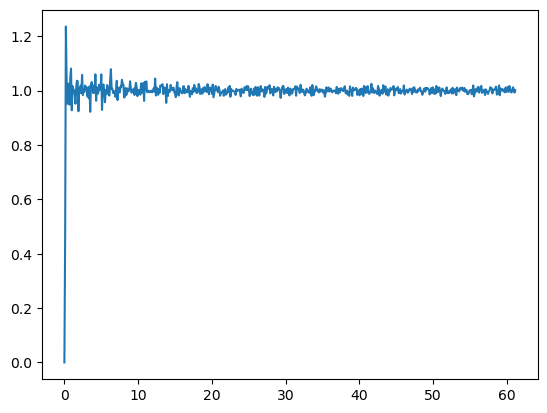

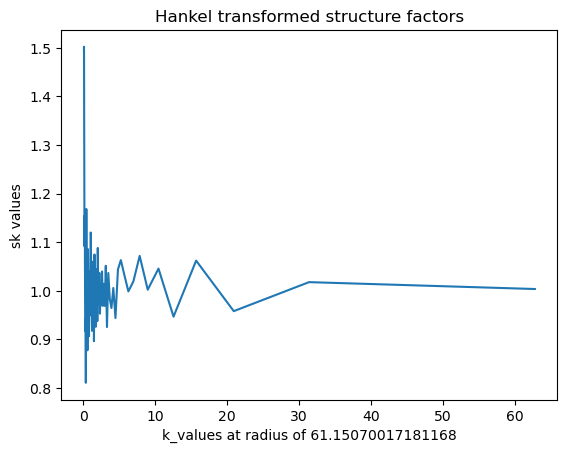

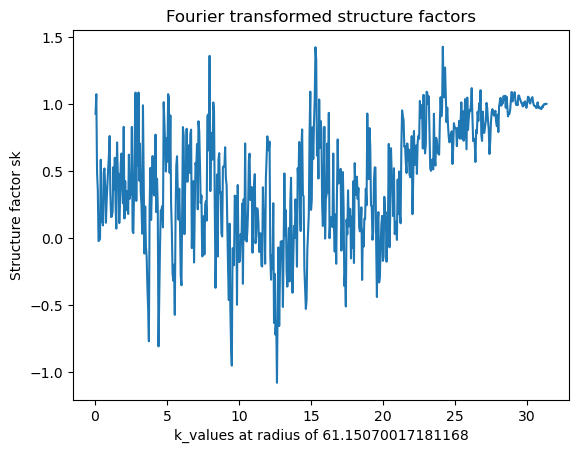

358.56747496281275


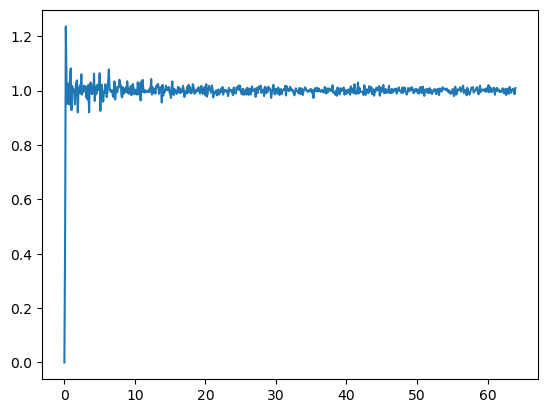

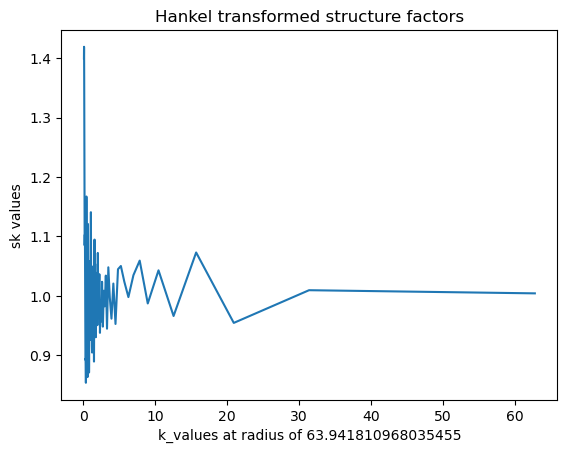

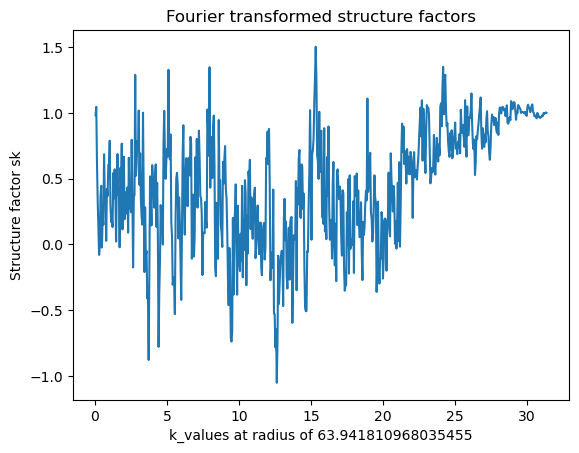

408.51469248941015


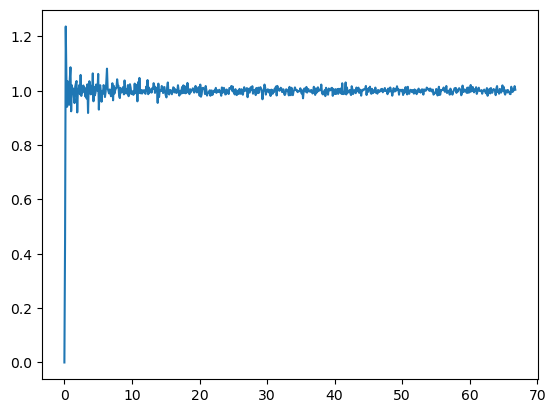

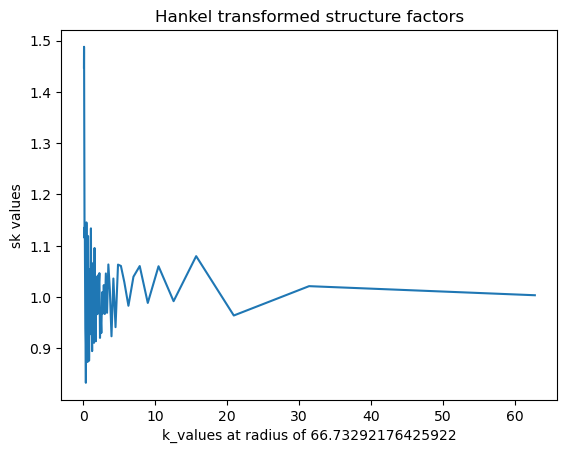

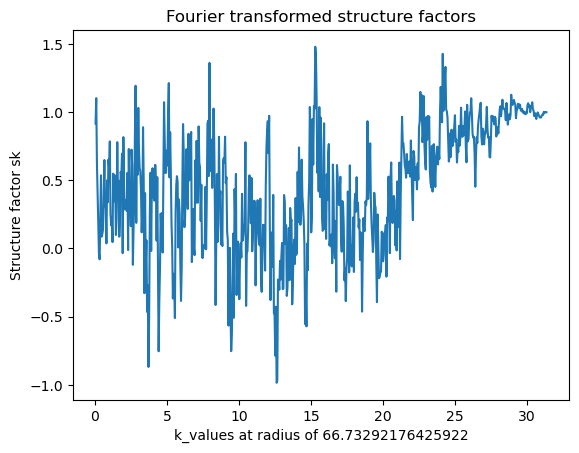

439.6591973662615


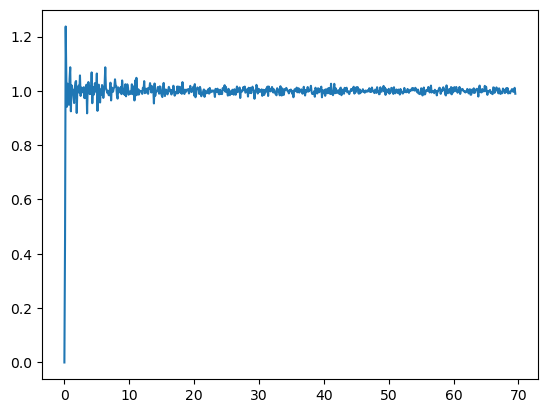

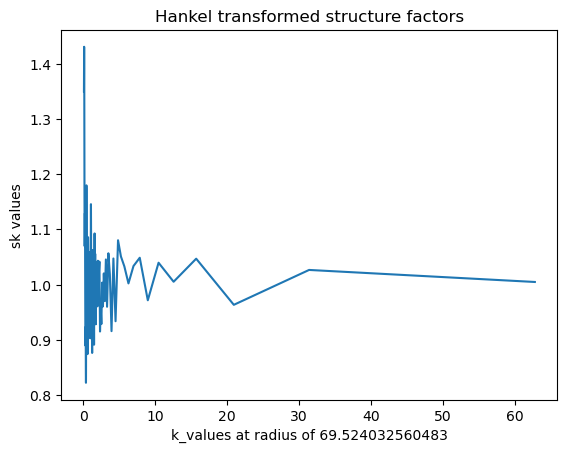

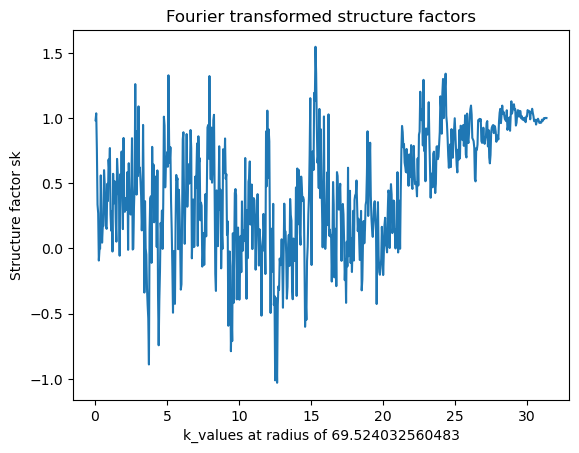

491.8722825317022


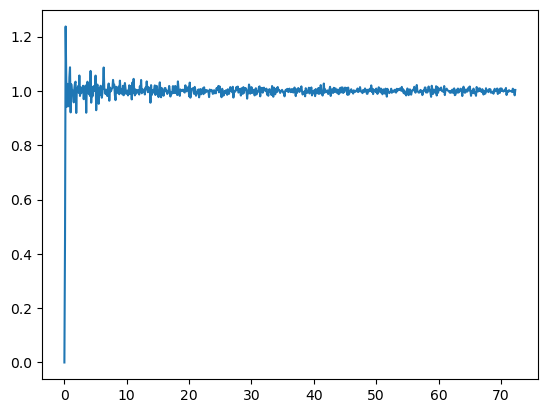

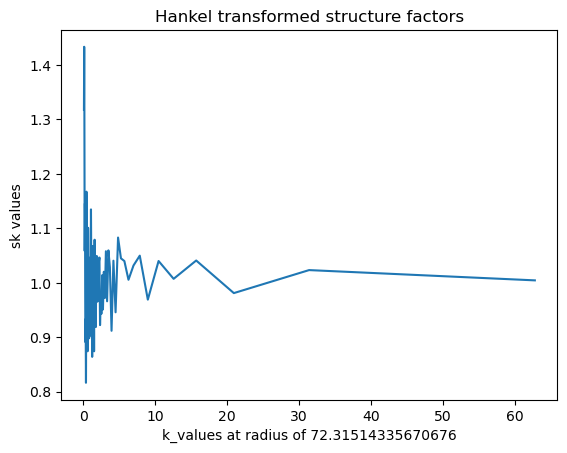

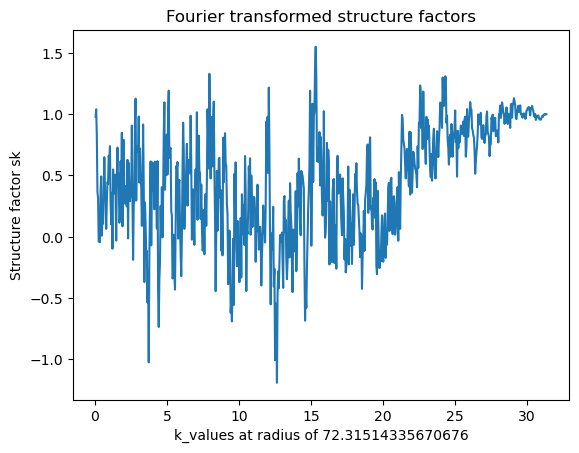

538.0188412411691


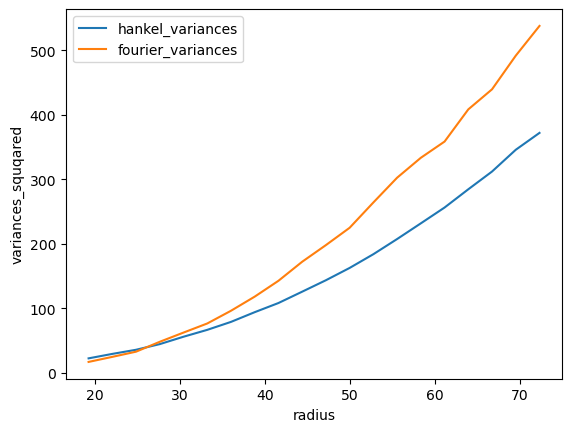

In [17]:
import calc
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(calc)
from calc import Hyperuniform_helper
        
file_name = f'data/positions/positions_1.txt'
data = np.loadtxt(file_name)
rho, box_length, volume_fraction = data[0]
radius = np.linspace(box_length/8, 15*box_length/32,20)
hankel_variances = np.zeros(len(radius))
fourier_variances = np.zeros(len(radius))
helper = Hyperuniform_helper(radius[0], np.zeros(3), data[1:,], rho)
r = None
for i in range(len(radius)):
    helper.set_radius(radius[i])
    all_gr = []
    for j in range(2000):
        file_name = f'data/positions/positions_{j}.txt'
        data = np.loadtxt(file_name)
        helper.set_positions(data[1:])
        r, gr = helper.calculate_radial_distribution(int(radius[i]/0.1), 2)
        all_gr.append(gr)
    avg_gr = np.mean(all_gr, axis=0)
    plt.plot(r, avg_gr)
    plt.show()
    r_fit, g_fit = helper.g_fit(r, avg_gr)
    k_values = np.sort(2*np.pi/r_fit[1:])
    sk = helper.hankel_transform_2d(g_fit[1:], r_fit[1:], k_values)
    plt.plot(k_values, sk)
    plt.xlabel(f"k_values at radius of {radius[i]}")
    plt.ylabel(f"sk values")
    plt.title("Hankel transformed structure factors")
    plt.show()
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk, k_values)
    hankel_variances[i] = variance_square
    sk = helper.Fourier_transform_2d(g_fit[1:])
    r_neg = -r_fit[1:][::-1]         # Negative radial coordinates
    r_full = np.concatenate((r_neg, r_fit[1:]))
    N = len(r_full)
    k_values = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, d=(r_fit[1] - r_fit[0])))
    plt.plot(k_values[k_values>0], sk[k_values>0])
    plt.xlabel(f"k_values at radius of {radius[i]}")
    plt.ylabel("Structure factor sk")
    plt.title("Fourier transformed structure factors")
    plt.show()
    variance_square = helper.variance_calculations_in_reciprocal_space_2d(sk[k_values>0], k_values[k_values>0])
    print(variance_square)
    fourier_variances[i] = variance_square

plt.plot(radius, hankel_variances, label="hankel_variances")
plt.plot(radius, fourier_variances, label="fourier_variances")
plt.xlabel("radius")
plt.ylabel("variances_squqared")
plt.legend()

68.44413348963339
88.18737378992256
109.81890148394763
131.96730226487597
156.74937368863348
181.72929298853055
207.4830893935889
234.3083278580287
261.33997128416337
287.97821764804917
311.68548112378693
331.9209767340457
350.43008992608566
364.5078406062151
371.35484457188016
373.86718120770024
367.7370350082345
361.0421845112244
346.8567152571072
322.76537235869023


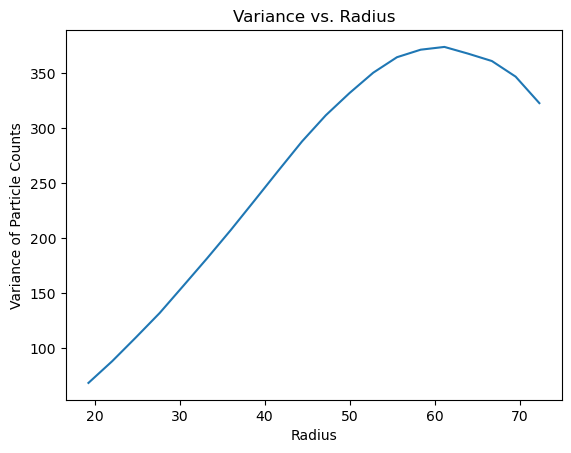

In [43]:
def particles_in_windows_real_variances(positions, origin1, radius):
    return np.sum(np.linalg.norm(positions - origin1, axis=1) < radius)

radiuses = np.linspace(box_length / 8, 15 * box_length / 32, 20)
variances_real = []

for k in range(len(radiuses)):
    total_centers = []
    x_range = np.linspace(-0.5* box_length + radiuses[k], 0.5 * box_length - radiuses[k], 101)
    y_range = np.linspace(-0.5 * box_length + radiuses[k], 0.5 * box_length - radiuses[k], 101)
    
    for i in range(2000):
        file_name = f'data/positions/positions_{i}.txt'
        data = np.loadtxt(file_name)
        
        num_centers = np.zeros(len(x_range))  # Initialize inside the loop over i
        for j in range(len(x_range)):
            origin = np.array([x_range[j], y_range[j], 0])
            particles = particles_in_windows_real_variances(
                data[1:], origin1=origin, radius=radiuses[k]
            )
            num_centers[j] = particles
        
        total_centers.append(num_centers[::])  # Append a copy to avoid reference issues
    
    total_centers = np.array(total_centers)  # Convert list to NumPy array for averaging
    avg_centers = np.mean(total_centers)
    variance = np.var(total_centers)
    print(variance)  # Use NumPy's variance function
    variances_real.append(variance)

plt.plot(radiuses, variances_real)
plt.xlabel('Radius')
plt.ylabel('Variance of Particle Counts')
plt.title('Variance vs. Radius')
plt.show()

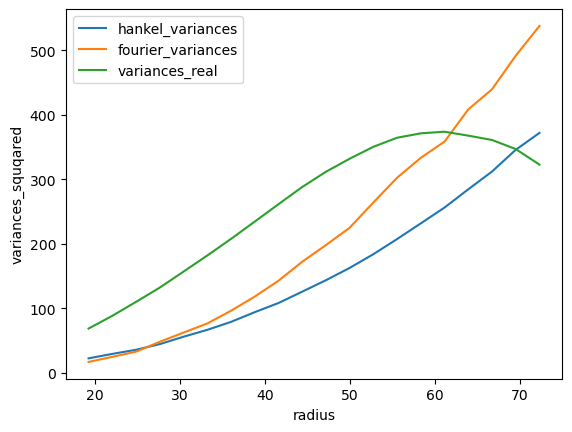

In [45]:
plt.plot(radiuses, hankel_variances, label="hankel_variances")
plt.plot(radiuses, fourier_variances, label="fourier_variances")
plt.plot(radiuses, variances_real, label="variances_real")
plt.xlabel("radius")
plt.ylabel("variances_squqared")
plt.legend()